#Trabalho de Análise de Dados Públicos - Eleições

Análise das despesas dos partidos politicas em relacão ao resultado das eleições nos anos de 2016.

Repositório de dados eleitorais: https://www.tse.jus.br/hotsites/pesquisas-eleitorais/index.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Eleições de 2016

### Estado de São Paulo

#### 1. Resultados de cada partido político

Arquivo completo: [votacao_partido_munzona_2016](https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_partido_munzona/votacao_partido_munzona_2016.zip)

Arquivo apenas do estado de São Paulo: "votacao_partido_munzona_2016_SP.csv"

In [139]:
filenameResults = 'votacao_partido_munzona_2016_SP.csv'

In [140]:
df_Results = pd.read_csv(filenameResults,sep=';',encoding='latin-1', usecols=["SG_PARTIDO", "QT_VOTOS_LEGENDA"])
df_Results

,SG_PARTIDO,QT_VOTOS_LEGENDA
0,PMDB,0
1,PTC,7
2,PTC,11
3,PTC,19
4,PTC,2
...,...,...
18523,SD,450
18524,PSDB,21
18525,PMB,102
18526,PSD,100


In [141]:
# Realizando uma um agrupamento para agregar os dados para cada partido 
grouped_df_Results = df_Results.groupby(["SG_PARTIDO"])
grouped_df_Results = grouped_df_Results.sum()
grouped_df_Results

,QT_VOTOS_LEGENDA
SG_PARTIDO,
DC,0
DEM,74993
MDB,0
NOVO,19296
PATRI,0
PC do B,8576
PCB,1509
PCO,553
PDT,71816


In [144]:
# Construindos os dados em uma lista para colocar no grafico
datas_Results = []
for i in grouped_df_Results['QT_VOTOS_LEGENDA']:
  datas_Results.append(i)

print(datas_Results)

[0, 74993, 0, 19296, 0, 8576, 1509, 553, 71816, 11224, 11249, 4673, 165720, 5625, 0, 51853, 4497, 51732, 46782, 135014, 9086, 18326, 5946, 100402, 16627, 73096, 699573, 4453, 8501, 56411, 4341, 208569, 5221, 71486, 3376, 18279, 62674, 16041, 31389]


In [143]:
# Construindo os nomes dos partidos em uma lista para as legendas do grafico
columns_Results = []
for i in df_Results["SG_PARTIDO"].drop_duplicates():
  columns_Results.append(i)

columns_Results.sort()
print(columns_Results)

['DC', 'DEM', 'MDB', 'NOVO', 'PATRI', 'PC do B', 'PCB', 'PCO', 'PDT', 'PEN', 'PHS', 'PMB', 'PMDB', 'PMN', 'PODE', 'PP', 'PPL', 'PPS', 'PR', 'PRB', 'PROS', 'PRP', 'PRTB', 'PSB', 'PSC', 'PSD', 'PSDB', 'PSDC', 'PSL', 'PSOL', 'PSTU', 'PT', 'PT do B', 'PTB', 'PTC', 'PTN', 'PV', 'REDE', 'SD']


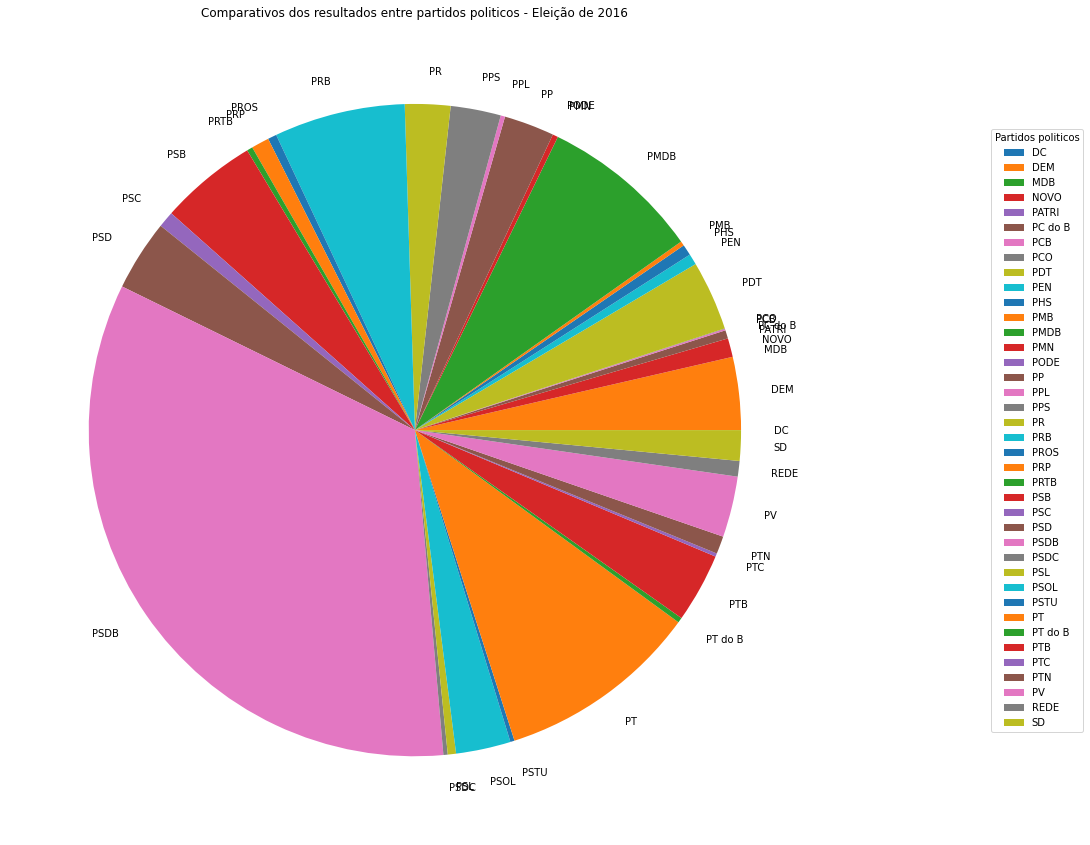

In [145]:
# Construindo o grafico
fig, ax = plt.subplots(figsize=(15,15), subplot_kw=dict(aspect='equal'))

mylabels = columns_Results

texts, autotexts = ax.pie(datas_Results, labels = mylabels)
ax.legend(columns_Results, title="Partidos politicos", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))

ax.set_title("Comparativos dos resultados entre partidos politicos - Eleição de 2016")
plt.show()

O partido PSDB foi o partido com maior número de votos em 2016 no estado de São Paulo.

In [162]:
print("Maior quantidade de votos: ", grouped_df_Results['QT_VOTOS_LEGENDA'].max())
print("Menor quantidade de votos: ", grouped_df_Results['QT_VOTOS_LEGENDA'].min())

Maior quantidade de votos:  699573
Menor quantidade de votos:  0


#### 2. Prestação de despeças de campanha para cada partido político 

Arquivo completo: [votacao_partido_munzona_2016](https://cdn.tse.jus.br/estatistica/sead/odsele/prestacao_contas/prestacao_contas_2016.zip)

Arquivo de despesa apenas do estado de São Paulo: "despesas_partidos_prestacao_contas_final_2016_SP.txt"

In [146]:
filenameExpenses = 'despesas_partidos_prestacao_contas_final_2016_SP.txt'

In [147]:
df_Expenses = pd.read_csv(filenameExpenses,sep=';',encoding='latin-1', usecols=["Sigla  Partido", "Valor despesa"])
df_Expenses

,Sigla Partido,Valor despesa
0,PMDB,1710
1,PMDB,285
2,PMDB,285
3,PMDB,285
4,PMDB,285
...,...,...
56019,PT,591
56020,PT,"5932,2"
56021,PEN,6390
56022,PSB,1500


In [148]:
# Convertendo os valores da despesa de string para float
df_Expenses['Valor despesa'] = df_Expenses['Valor despesa'].str.replace(',', ".").astype(float)

df_Expenses['Valor despesa'] = df_Expenses['Valor despesa'].astype(float)
df_Expenses

,Sigla Partido,Valor despesa
0,PMDB,1710.0
1,PMDB,285.0
2,PMDB,285.0
3,PMDB,285.0
4,PMDB,285.0
...,...,...
56019,PT,591.0
56020,PT,5932.2
56021,PEN,6390.0
56022,PSB,1500.0


In [149]:
# Realizando uma um agrupamento para agregar os dados para cada  partido 
grouped_df_Expenses = df_Expenses.groupby(["Sigla  Partido"])
grouped_df_Expenses = grouped_df_Expenses.sum()
grouped_df_Expenses

,Valor despesa
Sigla Partido,
DEM,6756533.04
NOVO,347215.06
PC do B,1723567.80
PCB,100.00
PDT,592116.11
PEN,1792660.99
PHS,696557.33
PMB,59698.14
PMDB,6106758.25


In [153]:
# Construindos os dados em uma lista para colocar no grafico
datas_Expenses = []
for i in grouped_df_Expenses['Valor despesa']:
  datas_Expenses.append(i)

print(datas_Expenses)

[6756533.03999996, 347215.0600000002, 1723567.799999999, 100.0, 592116.1099999977, 1792660.9900000095, 696557.3299999989, 59698.14, 6106758.249999941, 120239.55000000013, 1921440.3500000045, 108333.12999999998, 1997359.65000001, 5286160.249999974, 1991902.1500000115, 614628.1899999994, 766780.3999999985, 265211.6799999997, 7549315.939999958, 1256191.3199999996, 7180719.419999934, 5625193.7499999935, 126755.22000000004, 246751.37, 1008302.899999999, 152618.88000000012, 5905030.679999895, 195340.79000000004, 2674092.2199999946, 255696.90000000008, 703801.7099999991, 2258295.6500000204, 182337.08000000007, 1604967.070000004]


In [154]:
# Construindo os nomes dos partidos em uma lista para as legendas do grafico
columns_Expenses = []
for i in df_Expenses["Sigla  Partido"].drop_duplicates():
  columns_Expenses.append(i)

columns_Expenses.sort()
print(columns_Expenses)

['DEM', 'NOVO', 'PC do B', 'PCB', 'PDT', 'PEN', 'PHS', 'PMB', 'PMDB', 'PMN', 'PP', 'PPL', 'PPS', 'PR', 'PRB', 'PROS', 'PRP', 'PRTB', 'PSB', 'PSC', 'PSD', 'PSDB', 'PSDC', 'PSL', 'PSOL', 'PSTU', 'PT', 'PT do B', 'PTB', 'PTC', 'PTN', 'PV', 'REDE', 'SD']


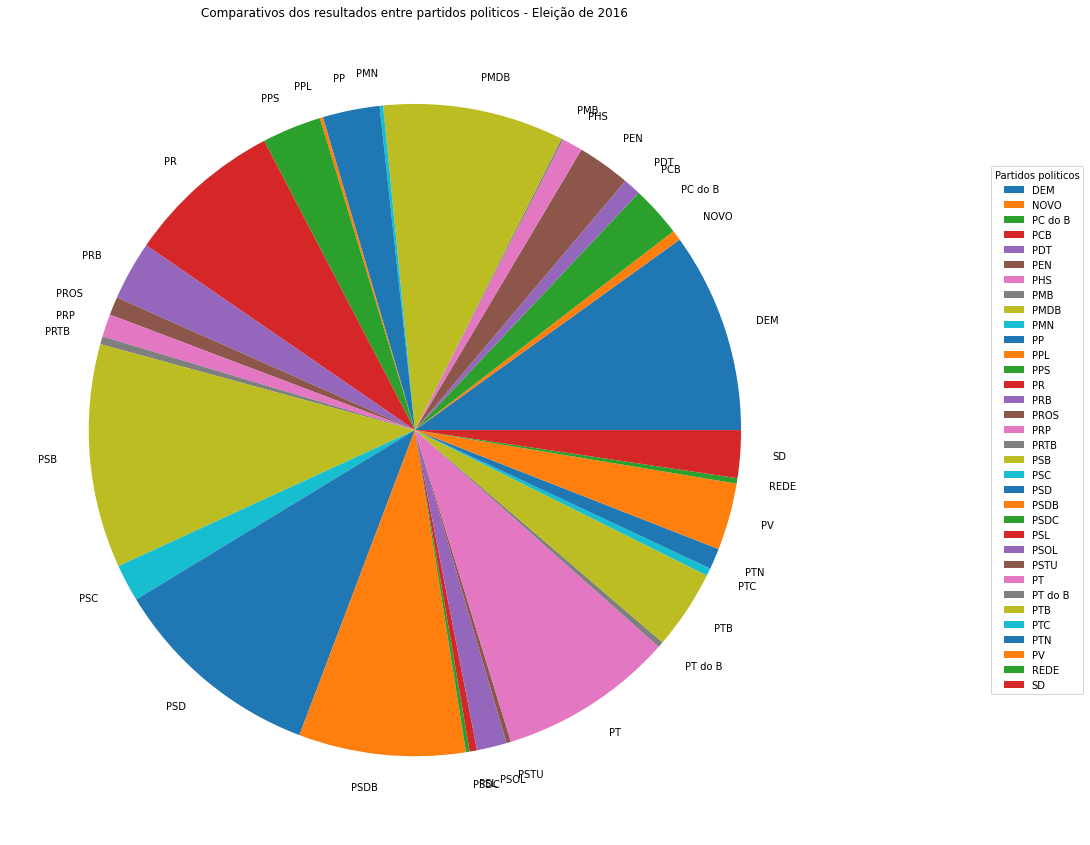

In [155]:
# Construindo o grafico
fig, ax = plt.subplots(figsize=(15,15), subplot_kw=dict(aspect='equal'))

mylabels = columns_Expenses

texts, autotexts = ax.pie(datas_Expenses, labels = mylabels)
ax.legend(columns_Expenses, title="Partidos politicos", loc="center left", bbox_to_anchor=(1.2, 0, 0.5, 1))

ax.set_title("Comparativos dos resultados entre partidos politicos - Eleição de 2016")
plt.show()

O partido PSB foi o partido com uma quantidade maior de despesas na campanha de 2016 do estado de São Paulo.

In [161]:
print("Maior despesa: ", grouped_df_Expenses['Valor despesa'].max())
print("Menor despesa: ", grouped_df_Expenses['Valor despesa'].min())

Maior despesa:  7549315.939999958
Menor despesa:  100.0
